In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-16 02:12:27.253822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 02:12:27.253869: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import, merge, and subset data

<Item title:"SAC_CTS_CRLF_Prey_Base_RT" type:Feature Layer Collection owner:Anooshi>
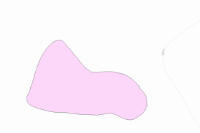

In [2]:
#get by direct ID
output = arcGIS_data_load('3342bd0bb244412fa9ca9fc830ffe59a')

ponds = output['data0']
surveys = output['table0']
observations = output['table1']
feature_service = output['feature_service']

In [3]:
# Merge feature and tables
pond_surveys = ponds.merge(surveys, left_on='GlobalID', right_on='Ref_to_Pond', how='inner')
pond_surveys = pond_surveys.drop(columns=['Ref_to_Pond', 'GlobalID_x','OBJECTID_x','OBJECTID_y'])

data = pond_surveys.merge(observations, left_on='GlobalID_y', right_on='Ref_to_Survey', how='inner')
data = data.drop(columns=['Ref_to_Survey', 'GlobalID_y'])

In [4]:
#Subset
sYear = input('Start Year? (YYYY)')
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 28


In [5]:
data.columns

Index(['Pond', 'Shape__Area', 'Shape__Length', 'SHAPE', 'BHR_Site',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Additional_Surveyors',
       'Comments', 'OBJECTID', 'Species', 'Abundance', 'Form', 'GlobalID'],
      dtype='object')

# QAQC 

In [6]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Additional_Surveyors
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Form
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Abundance
No \xa0 characters found
No double spaces foun

In [7]:
find_blank_entries(data,['Pond', 'SHAPE', 'Shape__Area', 'Shape__Length', 'Additional_Surveyors',
       'BHR_Site', 'Comments', 'Date', 'Surveyor_1', 'Surveyor_2', 'Abundance',
       'Form', 'GlobalID', 'OBJECTID', 'Species'])

No blank Observation_Date


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


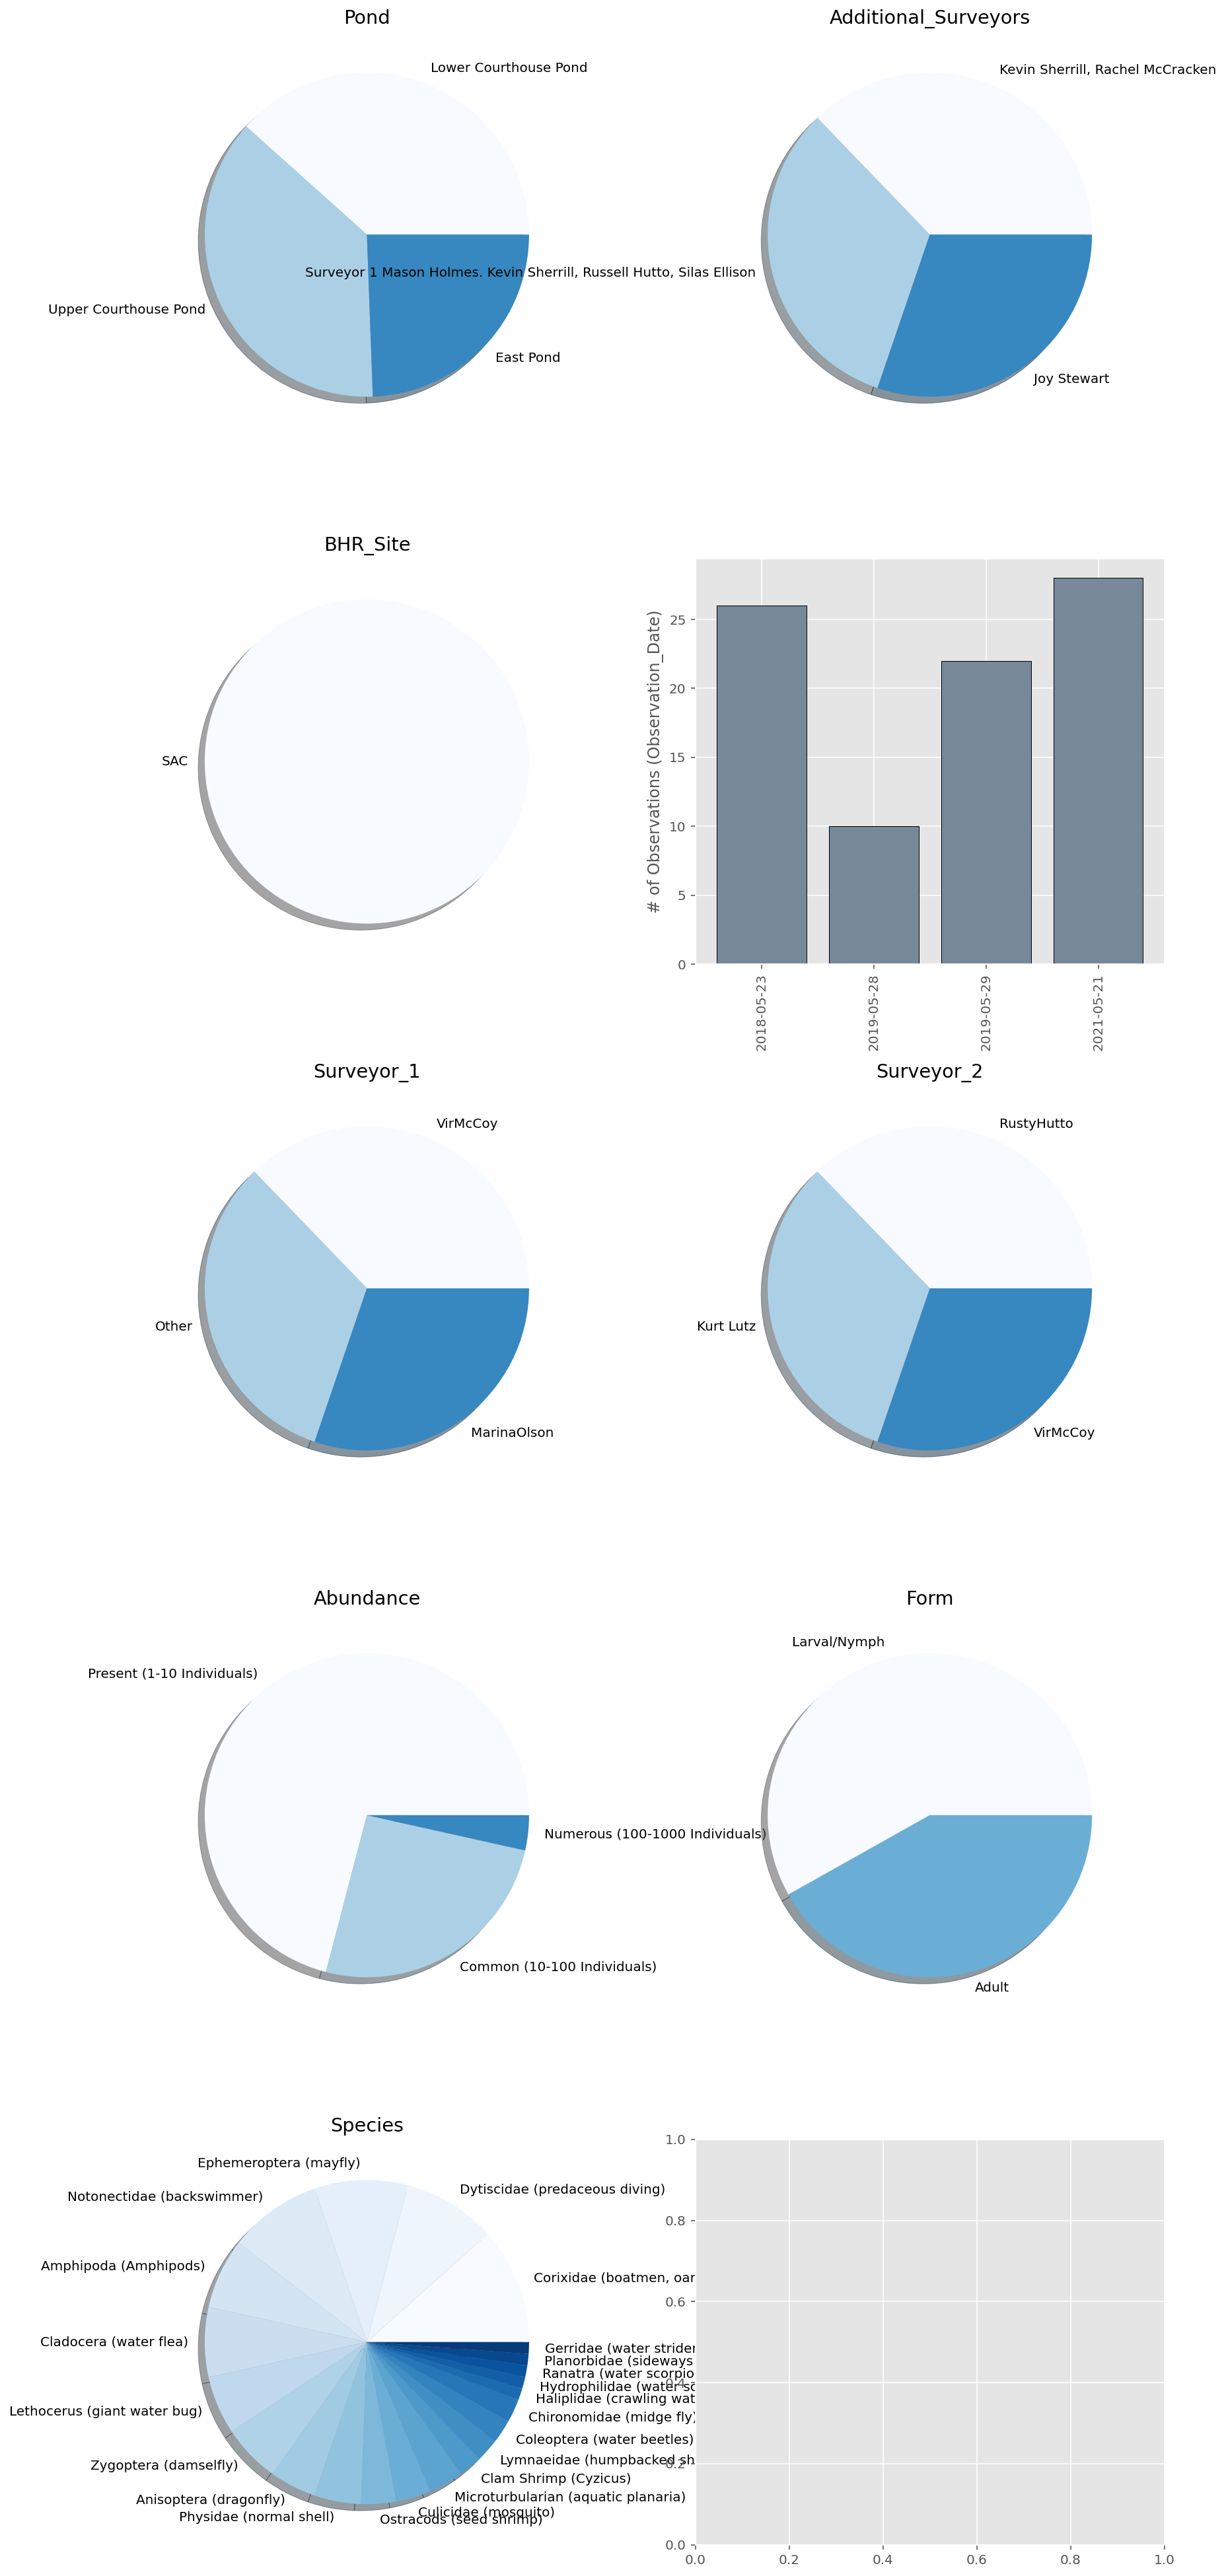

In [8]:
QAQC_plot(data, ['Pond', 'Additional_Surveyors',
       'BHR_Site', 'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Abundance',
       'Form', 'Species'])

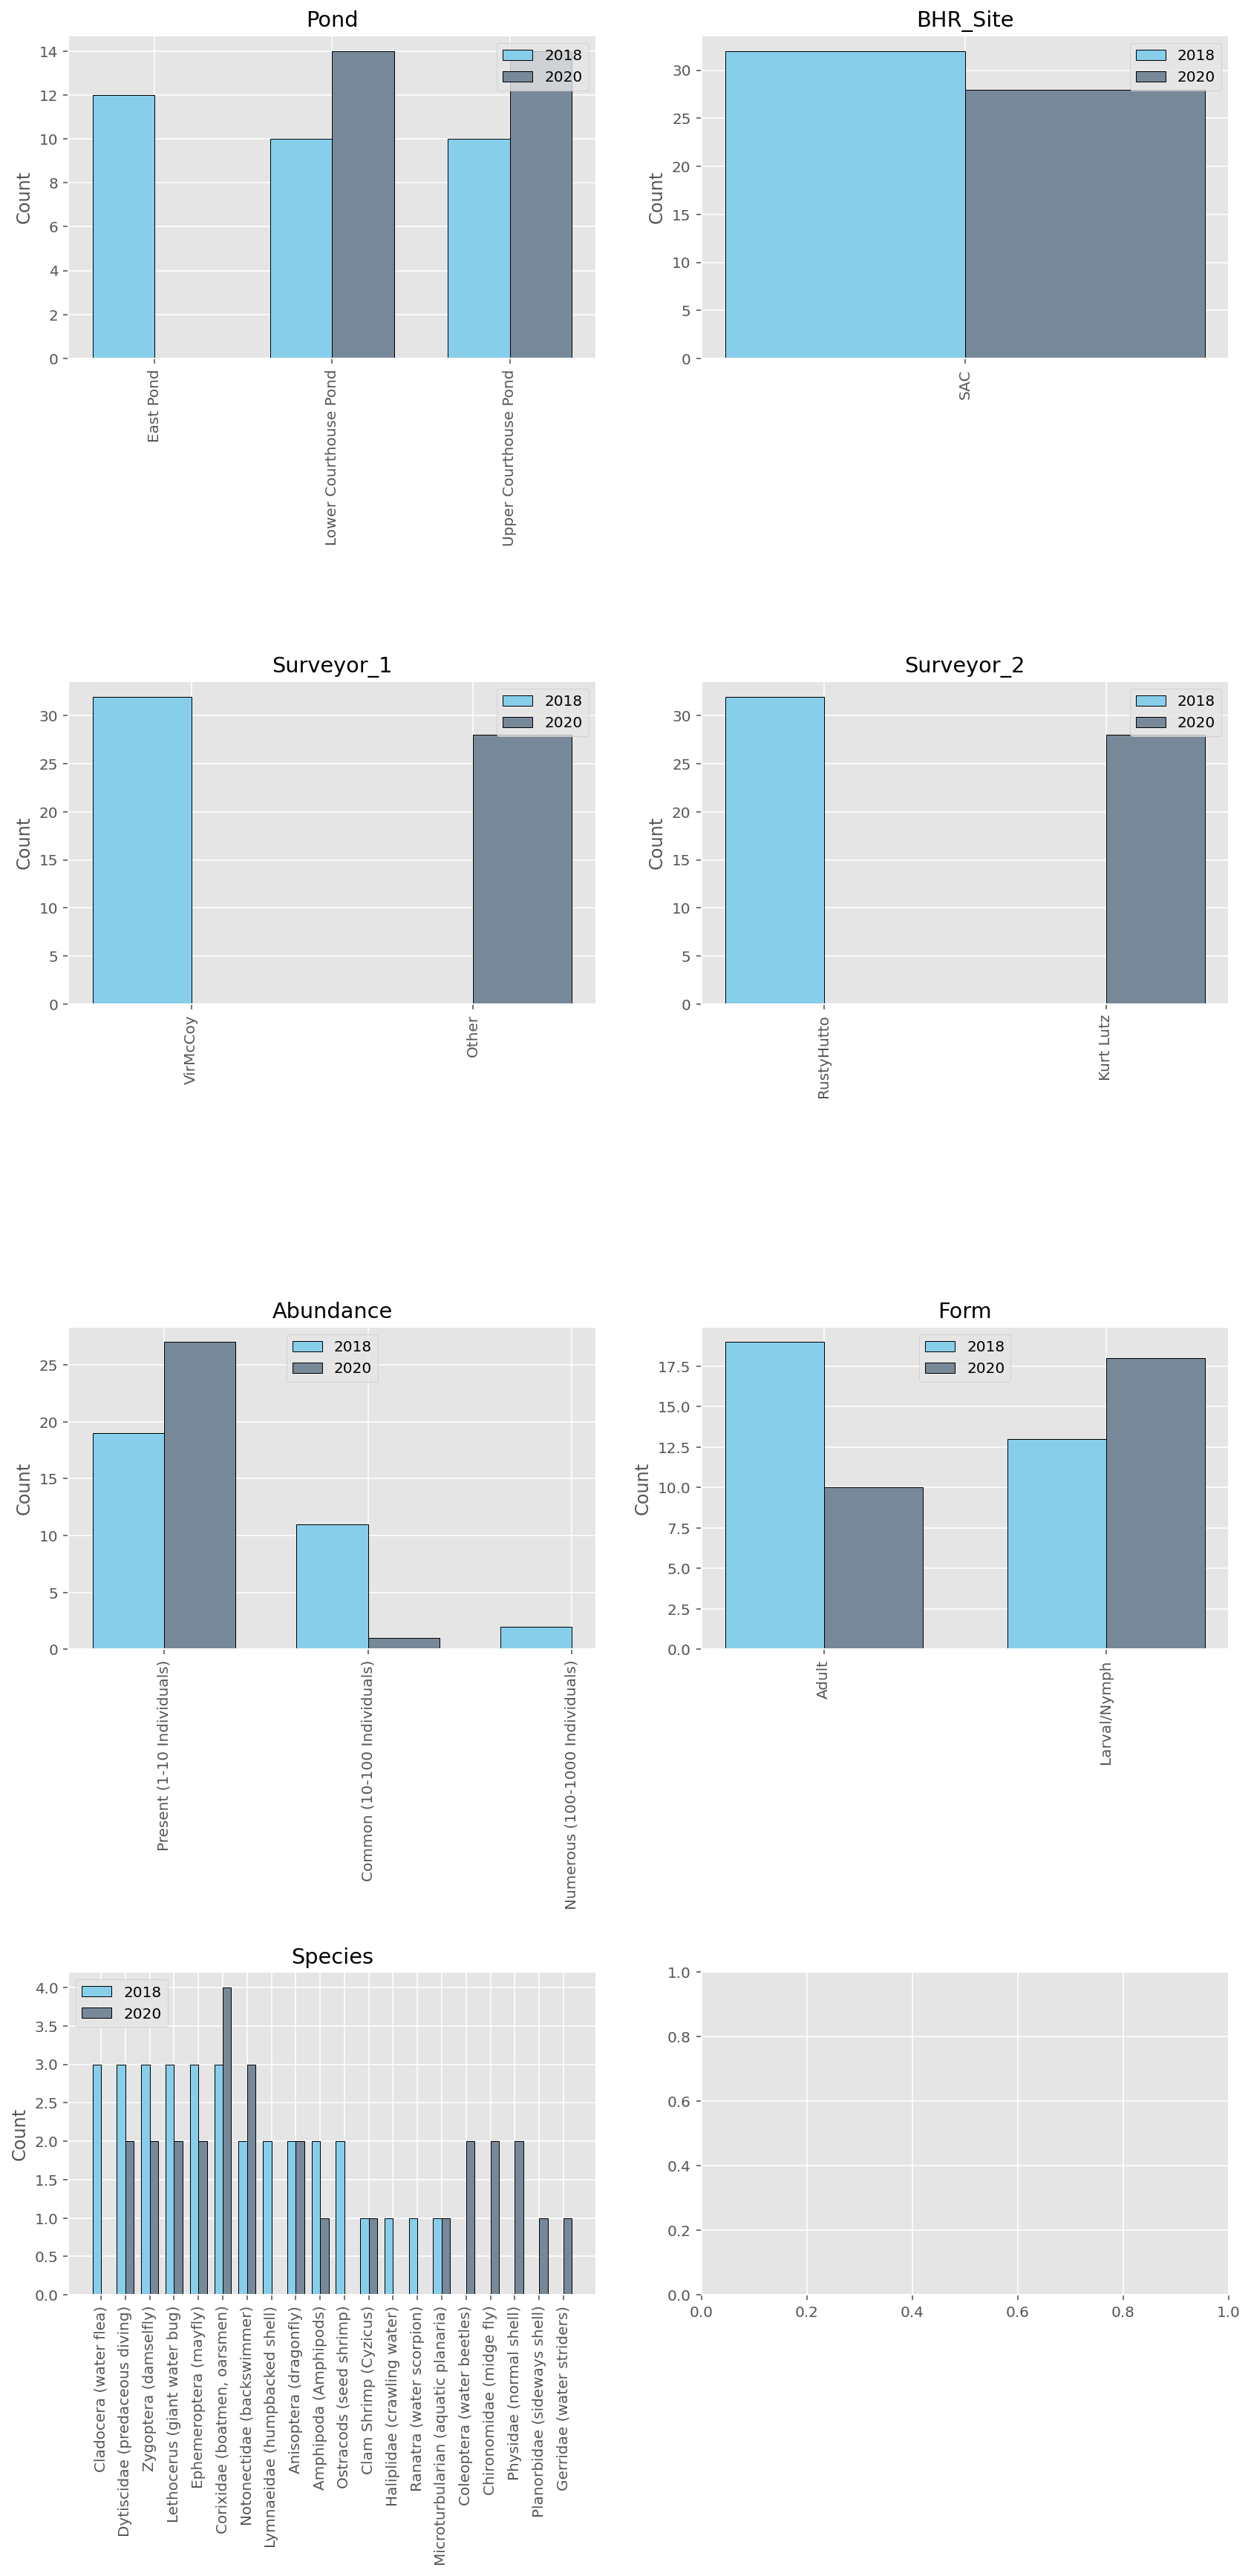

In [9]:
compare_years_catagorical(data,['Pond','BHR_Site','Surveyor_1', 'Surveyor_2', 'Abundance',
       'Form',  'Species'],'2018','2020')

# Data Deliverable


In [10]:
field_order = ['BHR_Site',
               'Observation_Date',
               'Surveyor_1', 
               'Surveyor_2',
               'Additional_Surveyors',
               'Pond', 
               'Species',
               'Abundance',
               'Form', 
               'Comments', 
               'OBJECTID',
               'GlobalID', 
               'SHAPE', 
               'Shape__Area', 
               'Shape__Length']

In [11]:
export_data_deliverable(data, feature_service, field_order)

Exported to Outputs/SAC_CTS_CRLF_Prey_Base_Data_20211216.xlsx
